<center>
<h1>CSE 6363-007: Machine Learning Assignment 4</h1> 
    <h2>Name: Ananthula, Vineeth Kumar. UTA ID: 1001953922</h2>
</center>
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install tensorflow 
from tensorflow import keras 
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


In [2]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, inputs):
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs

    def backward(self, output_gradient, learning_rate):
        self.gradient = self.losses.backward()
        i = len(self.layers) - 1
        while i >= 0:
            self.gradient = self.layers[i].backward(self.gradient)
            i -= 1

class Linear_Layer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))


class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)

class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)

        super().__init__(sigmoid, sigmoid_prime)

class Softmax(Layer):
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_gradient, learning_rate):
        # This version is faster than the one presented in the video
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

def binary_cross_entropy(y_true, y_pred):
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

class Sequential(Layer):
    def __init__(self,X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train
        
        
    def predict(self,network, input):
        output = input
        for layer in network:
            output = layer.forward(output)
        return output

    def train(self,network, loss, loss_prime, epochs = 1000, learning_rate = 0.01, verbose = True):
        errors = []
        for e in range(epochs):
            error = 0
            for x, y in zip(self.x_train, self.y_train):
                # forward
                output = self.predict(network, x)

                # error
                error += loss(y, output)

                # backward
                grad = loss_prime(y, output)
                for layer in reversed(network):
                    grad = layer.backward(grad, learning_rate)

            error /= len(self.x_train)
            errors.append(error)
            if verbose:
                print(f"{e + 1}/{epochs}, error={error}")
        return errors

In [3]:
'''Implement Xor
'''
X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

network = [
    Linear_Layer(2, 3),
    Tanh(),
    Linear_Layer(3, 1),
    Tanh()
]
s = Sequential(X, Y)
# train
print("Xor errors:")
s.train(network, mse, mse_prime, epochs=1000, learning_rate=0.1)


Xor errors:
1/1000, error=0.3769047177577785
2/1000, error=0.35302217881978626
3/1000, error=0.33635115752504574
4/1000, error=0.331601742194347
5/1000, error=0.33206671339649485
6/1000, error=0.33159281397038576
7/1000, error=0.3296180777572395
8/1000, error=0.32692138270604315
9/1000, error=0.32396288952731733
10/1000, error=0.3209242278518167
11/1000, error=0.3178695034876879
12/1000, error=0.31481915813182937
13/1000, error=0.31177687595204495
14/1000, error=0.3087392125237348
15/1000, error=0.3056995155116554
16/1000, error=0.30265001120242807
17/1000, error=0.2995832410803332
18/1000, error=0.2964931617800399
19/1000, error=0.293375965312237
20/1000, error=0.2902306197429434
21/1000, error=0.28705913366343283
22/1000, error=0.2838665640653252
23/1000, error=0.28066080176491226
24/1000, error=0.2774521776192059
25/1000, error=0.2742529367087362
26/1000, error=0.2710766279039408
27/1000, error=0.2679374542837256
28/1000, error=0.2648496267148004
29/1000, error=0.2618267588301946
30

571/1000, error=0.0009449265843543548
572/1000, error=0.0009401687255614446
573/1000, error=0.0009354560737971504
574/1000, error=0.0009307880005909227
575/1000, error=0.0009261638889516057
576/1000, error=0.0009215831331080231
577/1000, error=0.0009170451382564882
578/1000, error=0.0009125493203151314
579/1000, error=0.0009080951056847187
580/1000, error=0.0009036819310158687
581/1000, error=0.0008993092429824291
582/1000, error=0.0008949764980607793
583/1000, error=0.0008906831623149633
584/1000, error=0.0008864287111873887
585/1000, error=0.0008822126292950087
586/1000, error=0.000878034410230766
587/1000, error=0.0008738935563701146
588/1000, error=0.000869789578682584
589/1000, error=0.0008657219965480762
590/1000, error=0.000861690337577894
591/1000, error=0.0008576941374402909
592/1000, error=0.0008537329396904176
593/1000, error=0.0008498062956045361
594/1000, error=0.0008459137640183976
595/1000, error=0.0008420549111696706
596/1000, error=0.0008382293105441974
597/1000, error

[0.3769047177577785,
 0.35302217881978626,
 0.33635115752504574,
 0.331601742194347,
 0.33206671339649485,
 0.33159281397038576,
 0.3296180777572395,
 0.32692138270604315,
 0.32396288952731733,
 0.3209242278518167,
 0.3178695034876879,
 0.31481915813182937,
 0.31177687595204495,
 0.3087392125237348,
 0.3056995155116554,
 0.30265001120242807,
 0.2995832410803332,
 0.2964931617800399,
 0.293375965312237,
 0.2902306197429434,
 0.28705913366343283,
 0.2838665640653252,
 0.28066080176491226,
 0.2774521776192059,
 0.2742529367087362,
 0.2710766279039408,
 0.2679374542837256,
 0.2648496267148004,
 0.2618267588301946,
 0.258881336445908,
 0.25602428774315156,
 0.2532646721649943,
 0.25060949626350915,
 0.24806365453810694,
 0.2456299838027946,
 0.24330941198436207,
 0.24110117734174058,
 0.23900309224993083,
 0.23701182670746934,
 0.2351231899800477,
 0.23333239344188433,
 0.23163428286737808,
 0.23002353344925133,
 0.22849480518886214,
 0.22704285976230706,
 0.22566264244437767,
 0.2243493342

In [4]:
''' Handwritten Recognition 
'''
def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 1000)
x_test, y_test = preprocess_data(x_test, y_test, 20)
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

np.random.seed(2019)
train_size = 0.1
index = np.random.rand(len(x)) < train_size  # boolean index
x_train, x_test = x[index], x[~index]  # index and it's negation
y_train, y_test = y[index], y[~index]

In [5]:
# neural network
network = [
    Linear_Layer(28 * 28, 40),
    Tanh(),
    Linear_Layer(40, 10),
    Tanh()
]
S = Sequential(x_train, y_train)
# train with a learning rate of 0.1
err=S.train(network, mse, mse_prime, epochs=10, learning_rate=0.1)

# test
for x, y in zip(x_test, y_test):
    output = S.predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))


1/10, error=0.89056974273815
2/10, error=0.8515367236121424
3/10, error=0.8305869862234943
4/10, error=0.8149656680289509
5/10, error=0.8009770478829005
6/10, error=0.79040437992795
7/10, error=0.788444970430021
8/10, error=0.7628997936805424
9/10, error=0.7472377839387917
10/10, error=0.7339442080312922
pred: 3 	true: 5
pred: 8 	true: 0
pred: 0 	true: 4
pred: 6 	true: 1
pred: 8 	true: 9
pred: 0 	true: 2
pred: 5 	true: 1
pred: 6 	true: 3
pred: 8 	true: 1
pred: 3 	true: 4
pred: 6 	true: 3
pred: 4 	true: 5
pred: 6 	true: 3
pred: 6 	true: 6
pred: 5 	true: 1
pred: 5 	true: 7
pred: 0 	true: 8
pred: 8 	true: 6
pred: 0 	true: 9
pred: 5 	true: 4
pred: 7 	true: 0
pred: 6 	true: 9
pred: 3 	true: 1
pred: 7 	true: 1
pred: 8 	true: 2
pred: 6 	true: 4
pred: 4 	true: 2
pred: 7 	true: 7
pred: 5 	true: 3
pred: 6 	true: 8
pred: 5 	true: 6
pred: 6 	true: 9
pred: 5 	true: 0
pred: 1 	true: 5
pred: 6 	true: 6
pred: 7 	true: 0
pred: 6 	true: 7
pred: 1 	true: 6
pred: 6 	true: 1
pred: 3 	true: 8
pred: 5 	true:

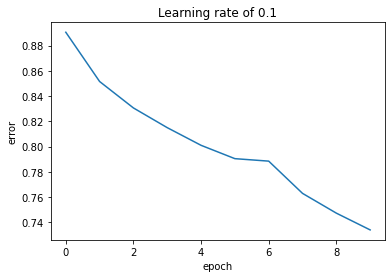

In [6]:
plt.plot(err)
plt.title("Learning rate of 0.1")
plt.xlabel("epoch")
plt.ylabel("error")
plt.show()

In [7]:
print("Training Model with learning rate of 0.01")
print("==========================================")
# train with learning rate of 0.01
err=S.train(network, mse, mse_prime,epochs=10, learning_rate=0.01)

# test
for x, y in zip(x_test, y_test):
    output = S.predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))


Training Model with learning rate of 0.01
1/10, error=0.7252141981290755
2/10, error=0.7138501541942971
3/10, error=0.7048400161298588
4/10, error=0.6967748973995372
5/10, error=0.691341896166
6/10, error=0.6867460457966409
7/10, error=0.6832264729214166
8/10, error=0.6798551547054816
9/10, error=0.6768146174208975
10/10, error=0.6743724918446483
pred: 3 	true: 5
pred: 8 	true: 0
pred: 0 	true: 4
pred: 6 	true: 1
pred: 8 	true: 9
pred: 6 	true: 2
pred: 5 	true: 1
pred: 6 	true: 3
pred: 8 	true: 1
pred: 3 	true: 4
pred: 6 	true: 3
pred: 4 	true: 5
pred: 9 	true: 3
pred: 6 	true: 6
pred: 5 	true: 1
pred: 5 	true: 7
pred: 0 	true: 8
pred: 8 	true: 6
pred: 0 	true: 9
pred: 5 	true: 4
pred: 8 	true: 0
pred: 6 	true: 9
pred: 3 	true: 1
pred: 7 	true: 1
pred: 8 	true: 2
pred: 6 	true: 4
pred: 4 	true: 2
pred: 7 	true: 7
pred: 5 	true: 3
pred: 6 	true: 8
pred: 5 	true: 6
pred: 6 	true: 9
pred: 5 	true: 0
pred: 1 	true: 5
pred: 6 	true: 6
pred: 7 	true: 0
pred: 6 	true: 7
pred: 1 	true: 6
pred:

pred: 7 	true: 9
pred: 1 	true: 0
pred: 9 	true: 7
pred: 3 	true: 1
pred: 3 	true: 4
pred: 1 	true: 2
pred: 6 	true: 7
pred: 6 	true: 3
pred: 8 	true: 6
pred: 5 	true: 7
pred: 0 	true: 5
pred: 8 	true: 8
pred: 4 	true: 4
pred: 1 	true: 5
pred: 8 	true: 5
pred: 3 	true: 2
pred: 6 	true: 7
pred: 5 	true: 1
pred: 7 	true: 5
pred: 6 	true: 6
pred: 8 	true: 8
pred: 6 	true: 5
pred: 8 	true: 8
pred: 6 	true: 4
pred: 8 	true: 0
pred: 8 	true: 7
pred: 6 	true: 9
pred: 5 	true: 9
pred: 1 	true: 2
pred: 5 	true: 9
pred: 6 	true: 7
pred: 5 	true: 7
pred: 8 	true: 8
pred: 6 	true: 7
pred: 0 	true: 4
pred: 6 	true: 2
pred: 3 	true: 6
pred: 5 	true: 9
pred: 8 	true: 1
pred: 5 	true: 6
pred: 3 	true: 4
pred: 6 	true: 2
pred: 8 	true: 5
pred: 6 	true: 7
pred: 6 	true: 0
pred: 5 	true: 7
pred: 7 	true: 1
pred: 6 	true: 0
pred: 6 	true: 3
pred: 5 	true: 7
pred: 1 	true: 6
pred: 0 	true: 5
pred: 6 	true: 0
pred: 6 	true: 6
pred: 3 	true: 1
pred: 3 	true: 5
pred: 5 	true: 1
pred: 9 	true: 7
pred: 0 	true:

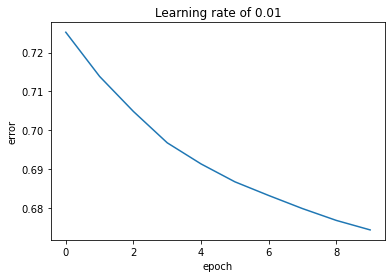

In [8]:
plt.plot(err)
plt.title("Learning rate of 0.01")
plt.xlabel("epoch")
plt.ylabel("error")
plt.show()